<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-packages" data-toc-modified-id="Import-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import packages</a></span></li><li><span><a href="#Create-Dataset" data-toc-modified-id="Create-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create Dataset</a></span></li><li><span><a href="#Create-Basic-Dotplot" data-toc-modified-id="Create-Basic-Dotplot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create Basic Dotplot</a></span><ul class="toc-item"><li><span><a href="#Definte-the-Data" data-toc-modified-id="Definte-the-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Definte the Data</a></span></li><li><span><a href="#Order-the-classes" data-toc-modified-id="Order-the-classes-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Order the classes</a></span></li><li><span><a href="#Import-package" data-toc-modified-id="Import-package-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Import package</a></span></li><li><span><a href="#Create-basic-Dotplot" data-toc-modified-id="Create-basic-Dotplot-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Create basic Dotplot</a></span></li></ul></li><li><span><a href="#Define-colours-for-each-class" data-toc-modified-id="Define-colours-for-each-class-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Define colours for each class</a></span></li><li><span><a href="#Change-row-order" data-toc-modified-id="Change-row-order-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Change row order</a></span><ul class="toc-item"><li><span><a href="#'Snake'" data-toc-modified-id="'Snake'-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>'Snake'</a></span></li><li><span><a href="#Reverse-individual-rows" data-toc-modified-id="Reverse-individual-rows-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Reverse individual rows</a></span></li></ul></li><li><span><a href="#Add-Labels-to-the-classes" data-toc-modified-id="Add-Labels-to-the-classes-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Add Labels to the classes</a></span></li><li><span><a href="#Add-a-Title-and-Caption" data-toc-modified-id="Add-a-Title-and-Caption-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Add a Title and Caption</a></span></li><li><span><a href="#Optimising-row-order" data-toc-modified-id="Optimising-row-order-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Optimising row order</a></span></li><li><span><a href="#Saving-the-file" data-toc-modified-id="Saving-the-file-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Saving the file</a></span></li><li><span><a href="#Alternate-Layouts" data-toc-modified-id="Alternate-Layouts-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Alternate Layouts</a></span></li><li><span><a href="#Plots-for-medium" data-toc-modified-id="Plots-for-medium-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Plots for medium</a></span></li></ul></div>

# Import packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import os

# Create Dataset
The example in the Medium article is based on the kaggle "Novel corona virus 2019 dataset" available at 
https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset
Here we will load that from a .csv and transform it into a very simple dataset for use in the dotplot.

We're going to just look at how common the common symptoms are, namely fever and cough.

In [3]:
df = pd.read_csv('../data/COVID19_open_line_list.csv')
df.rename(columns = {'symptoms': 'symptom'},
          inplace = True)
dfs = df.loc[~df['symptom'].isnull()].copy()
dfs['symptom'] = dfs['symptom'].apply(lambda x: x.replace('feve\\', 'fever').replace('feaver', 'fever'))
df.drop(df.loc[df['symptom'].isnull()].index, inplace=True)

Now create a dictionary that has 4 classes of symptoms 'Fever', 'Cough', 'Fever and Cough', and 'Neither'. The dictionary will have the class names as keys and the count of the number of people who exhibit that symptom as values.

In [4]:
symptom_dict = {}
symptom_dict['Fever'] = len(df.loc[df['symptom'].str.contains('fever') & 
                                   (~df['symptom'].str.contains('cough'))].index)
symptom_dict['Cough'] = len(df.loc[~df['symptom'].str.contains('fever') & 
                                   df['symptom'].str.contains('cough')].index)
symptom_dict['Fever and cough'] = len(df.loc[df['symptom'].str.contains('fever') & 
                                   df['symptom'].str.contains('cough')].index)
symptom_dict['Neither'] = len(df.loc[~df['symptom'].str.contains('fever') & 
                                   ~df['symptom'].str.contains('cough')].index)

In [5]:
symptom_dict

{'Fever': 230, 'Cough': 48, 'Fever and cough': 130, 'Neither': 85}

# Create Basic Dotplot

## Definte the Data
The first keyword argument that we need to pass into our dot plot class is the dictionary that contains th einformation of how many people have each class of symptoms. This keyword argument is called `data_dict`.

In [6]:
data_dict = symptom_dict

## Order the classes
The keyword argument `class_labels` tells the plot what order to plot the classes in starting from the bottom row.

In [7]:
class_labels = ['Fever', 'Fever and cough', 
                'Cough', 'Neither']

## Import package
Let's import the package from the relative path location with in this Github folder.

In [8]:
cwd = os.getcwd()
os.chdir('../src')
from dot_plot_code import create_dot_plot
os.chdir(cwd)

## Create basic Dotplot

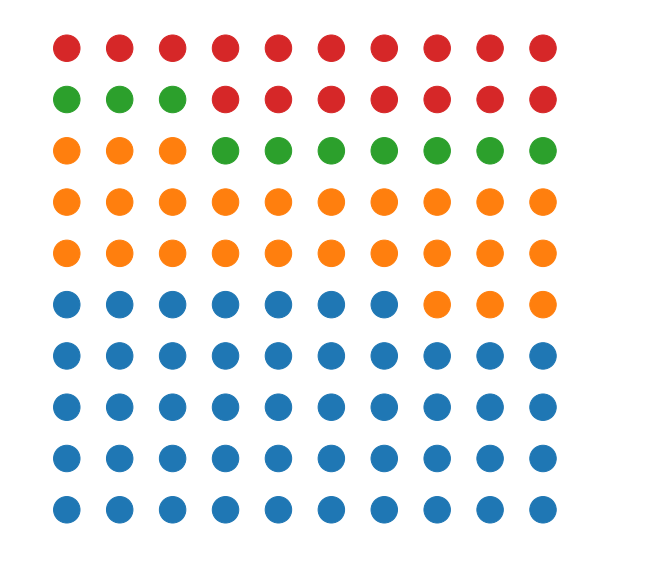

In [9]:
dotplot_figure = create_dot_plot(
    class_labels=class_labels,
    data_dict=data_dict)

# Define colours for each class
This is an optional keyword argument with defaults applied if it is not provided. The `color_dict` keyword has the class labels as keys and an associated color to plot.

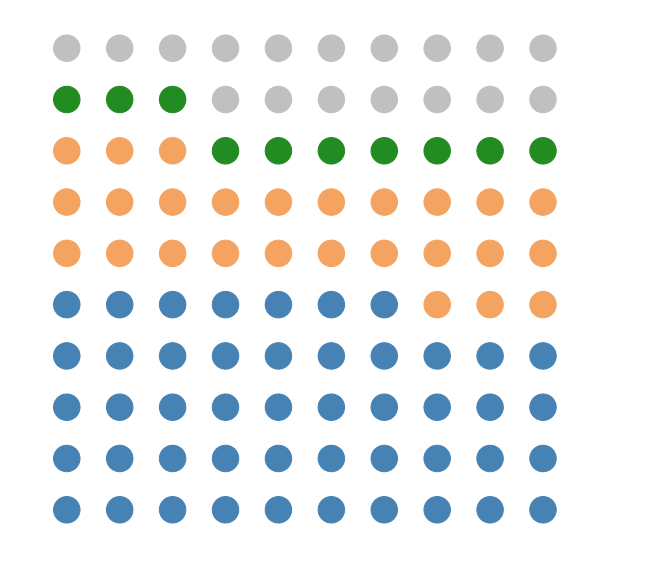

In [10]:
color_dict = {
    'Fever': 'steelblue',
    'Fever and cough': 'sandybrown',
    'Neither': 'silver',
    'Cough': 'forestgreen'}

dotplot_figure = create_dot_plot(
    class_labels=class_labels,
    data_dict=symptom_dict,
    color_dict=color_dict)

# Change row order

## 'Snake'
The default ordering starts each row from left to right. In some case this isn't appropriate. A class for example that contains just 2 dots might end up with one dot on the right of a line and the other dot on the left of the line above. To me, this is not an ideal arrangement. To deal with this scenario an additional parameter `reversed_rows='snake'` can be passed into the class. This alternates the order of the dots on each line so that the first line is left to right and the second is right to left etc.

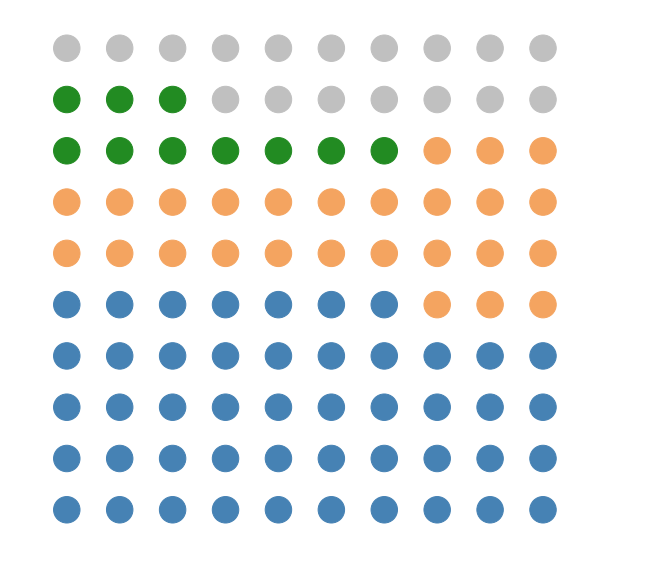

In [11]:
dotplot_figure = create_dot_plot(
    class_labels=class_labels,
    data_dict=symptom_dict,
    color_dict=color_dict,
    reversed_rows='snake')

Notice that now the green dots are all grouped together in a single cluster; this may or may not be preferable in different settings. 

## Reverse individual rows
If snaking the rows still isn't appropriate then a list of row numbers can be passed into `reversed_rows` with the ordering starting at 0 with the bottom row.

For example, if we wanted the order of the dots in the 5th and 9th rows to be reversed we can do the following

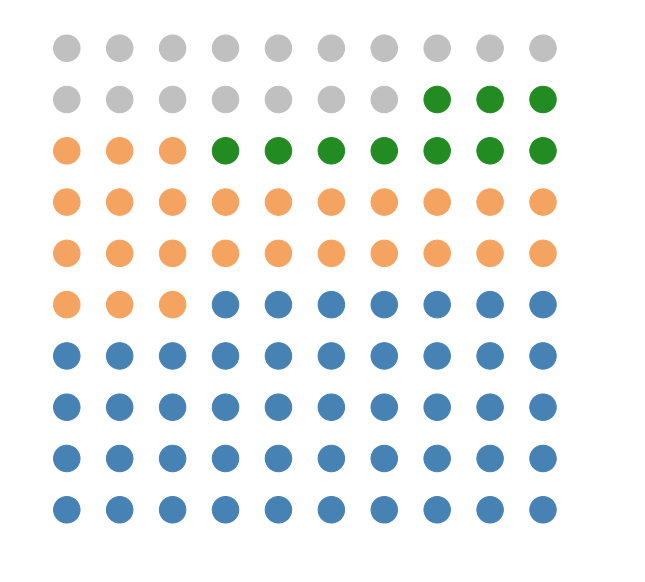

In [12]:
dotplot_figure = create_dot_plot(
    class_labels,
    data_dict,
    color_dict=color_dict,
    reversed_rows=[4, 8])

# Add Labels to the classes
This is where the plot really comes into its own. The class has an option to add labels to each of the classes by passing in `ignore_labels=False`

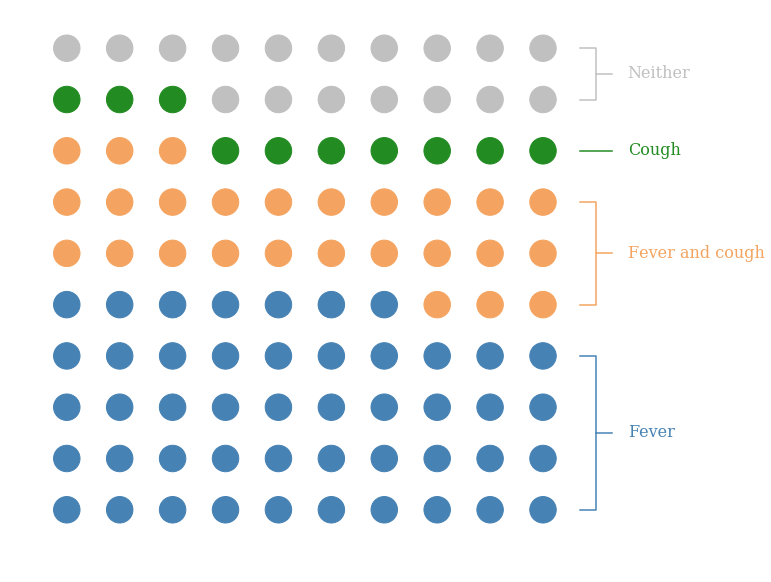

In [13]:
dotplot_figure = create_dot_plot(
    class_labels=class_labels,
    data_dict=symptom_dict,
    color_dict=color_dict,
    ignore_labels=False)

# Add a Title and Caption
The class comes with the option of adding a well placed title and caption.

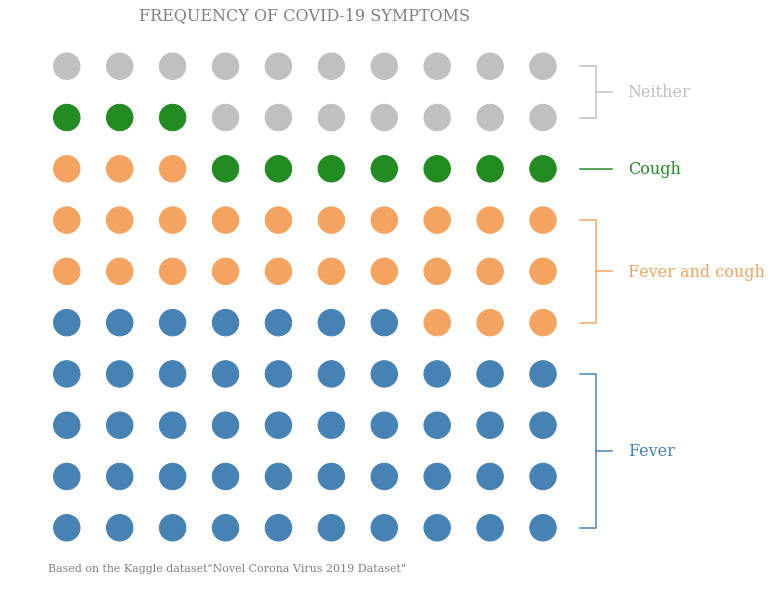

In [14]:
dotplot_figure = create_dot_plot(
    class_labels,
    data_dict,
    color_dict=color_dict,
    ignore_labels=False,
    title='Frequency of covid-19 symptoms',
    caption='Based on the Kaggle dataset\
"Novel Corona Virus 2019 Dataset"')

# Optimising row order
Now that we can create the full figure, let's play around with the row order to get the best layout. Let's try reversing just rows 4 and 7

ValueError: Class 'Cough' does not have a dot on the right hand side

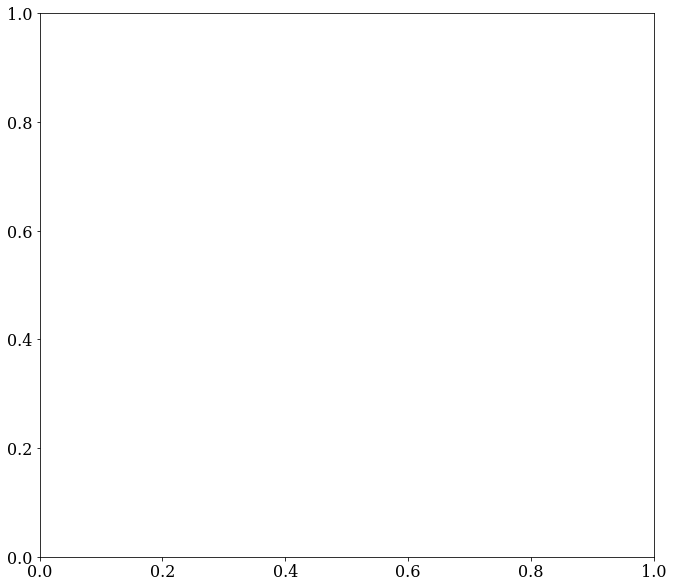

In [15]:
dotplot_figure = create_dot_plot(class_labels,
                    data_dict,
                    color_dict=color_dict,
                    reversed_rows=[4, 7],
                    ignore_labels=False,
                    title='Frequency of covid-19 symptoms',
                    caption='Based on the Kaggle dataset "Novel Corona Virus 2019 Dataset"')

In this case we get an error telling us that the 'Cough' class doesn't have a dot on the right hand side. This means that we can't add the labels. To see what's going on, let's turn the labels off using `ignore_labels=True`

In [ ]:
dotplot_figure = create_dot_plot(class_labels,
                    data_dict,
                    color_dict=color_dict,
                    reversed_rows=[4, 7],
                    ignore_labels=True,
                    title='Frequency of covid-19 symptoms',
                    caption='Based on the Kaggle dataset "Novel Corona Virus 2019 Dataset"')

Now we can see that all the green dots are clustered on the left hand side and the problem with the labels becomes apparent.

Let's keep the labels off until we've sorted the layout. The optimal layout in one where the size of the labels is representative of the class sizes. In this case that would have the blue 'Fever' class to cover 5 rows (rounding 47% up to 50%). The green cough only class is exactly 10% and should therefore only have a single row labelled. Unlike in Section 6 above. The difficulty in this exercise is how wide to make the 'neither' class  at 17% and the 'fever and cough' class with 26%. My preferred choice would be to use 2 rows for the orange 'fever and cough' and 2 for the grey 'neither'. Partly because, mathematically, 17 is closer to 20 than 26 is to 30 but also the proportion of people with a fever is 73% (sum of 'fever' and 'fever and cough'). Using 5 rows for 'fever' and 2 rows for 'fever and cough' would show this proportion most appropriately. 

The figure below would be my preferred visualisation.

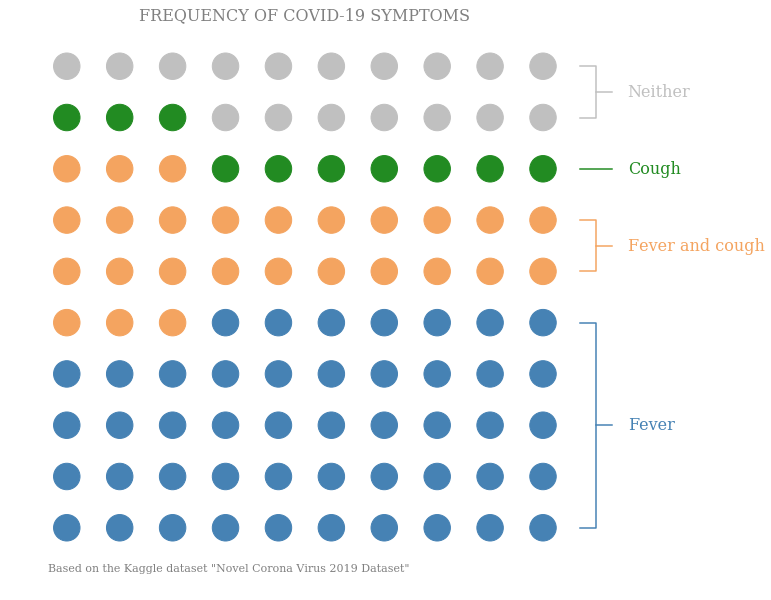

In [16]:
dotplot_figure = create_dot_plot(class_labels,
                    data_dict,
                    color_dict=color_dict,
                    reversed_rows=[4],
                    ignore_labels=False,
                    title='Frequency of covid-19 symptoms',
                    caption='Based on the Kaggle dataset "Novel Corona Virus 2019 Dataset"')

# Saving the file
The `create_dot_plot` class has 2 attributes `create_dot_plot.f` and `create_dot_plot.ax` which are the usual figure and axes handles from matplotlib. You can therefore make any alterations you want my modifying these using standard matplotlib methods. That includes saving the figure which defaults to a high res png image with a transparent background.

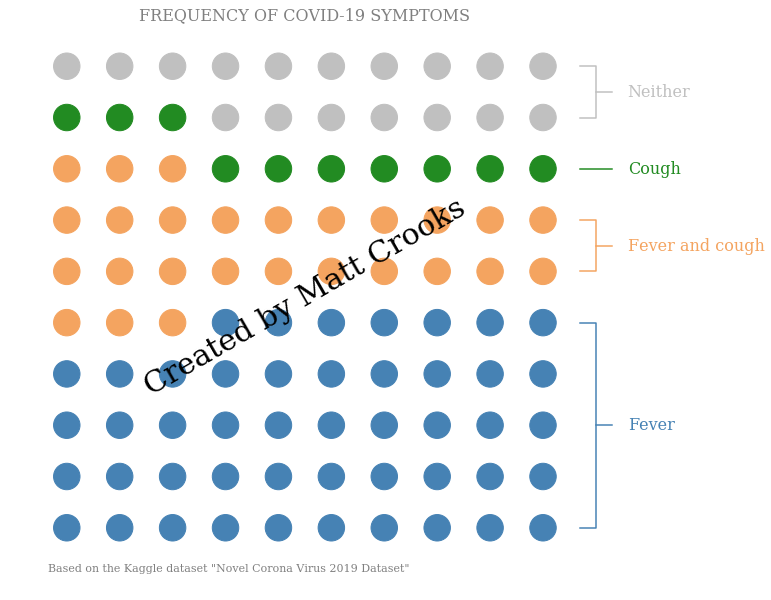

In [17]:
dotplot_figure = create_dot_plot(class_labels,
                    data_dict,
                    color_dict=color_dict,
                    reversed_rows=[4],
                    ignore_labels=False,
                    title='Frequency of covid-19 symptoms',
                    caption='Based on the Kaggle dataset "Novel Corona Virus 2019 Dataset"')
dotplot_figure.ax.text(4.5, 4.5, 'Created by Matt Crooks',
                       size=30,
                       color='black',
                       rotation=30,
                       horizontalalignment='center',
                       verticalalignment='center')
dotplot_figure.f.savefig(
    '../figures/savefig_example.png')

# Alternate Layouts

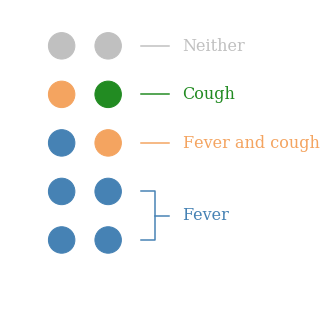

In [20]:
data_dict_rounded = {'Fever': 50, 
                     'Fever and cough': 20, 
                     'Neither': 20, 
                     'Cough': 10}
dotplot_figure = create_dot_plot(
    class_labels,  
    data_dict=data_dict_rounded,              
    color_dict=color_dict,            
    ignore_labels=False,           
    grid_shape=(2, 5))

# Plots for medium

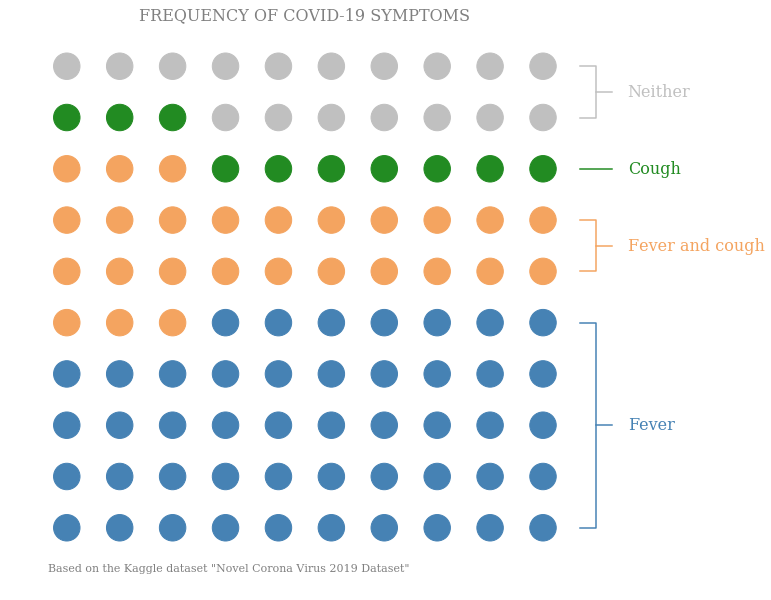

In [21]:
dotplot_figure = create_dot_plot(class_labels,
                    data_dict,
                    color_dict=color_dict,
                    reversed_rows=[4],
                    ignore_labels=False,
                    title='Frequency of covid-19 symptoms',
                    caption='Based on the Kaggle dataset "Novel Corona Virus 2019 Dataset"')